## Performing Exploratory Data Analysis for Student Retention

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import scipy.stats as stats

from tools.utils import combine_columns, compute_feature_importance

In [ ]:
# Load in cleaned data
data = pd.read_csv("data/Most-Recent-Cohorts-Institution-filtered.csv")
data = data.drop('Unnamed: 0', axis=1)

,UNITID,INSTNM,CITY,HIGHDEG,CONTROL,ST_FIPS,REGION,LOCALE,LOCALE2,CCUGPROF,...,MD_FAMINC,FAMINC_IND,MN_EARN_WNE_P10,UGDS_MEN,UGDS_WOMEN,GRADS,RET_FT4_POOLED,RET_FTL4_POOLED,PRGMOFR,ADMCON7
0,100654,Alabama A & M University,Normal,4,1,1,5,12.0,NaN,10.0,...,23553,10340.346032,35500,0.3978,0.6022,884.0,0.5533,NaN,NaN,1.0
1,100663,University of Alabama at Birmingham,Birmingham,4,1,1,5,12.0,NaN,9.0,...,34489,30607.18029,48400,0.3816,0.6184,8685.0,0.8477,NaN,NaN,1.0
2,100690,Amridge University,Montgomery,4,2,1,5,12.0,NaN,5.0,...,15033.5,20596.158491,47600,0.2886,0.7114,477.0,0.5000,NaN,NaN,NaN
3,100706,University of Alabama in Huntsville,Huntsville,4,1,1,5,12.0,NaN,15.0,...,44787,27941.821963,52000,0.5891,0.4109,1972.0,0.8234,NaN,NaN,1.0
4,100724,Alabama State University,Montgomery,4,1,1,5,12.0,NaN,10.0,...,22080.5,8551.802974,30600,0.3605,0.6395,458.0,0.6164,NaN,NaN,1.0


In [ ]:
four_yr_retention = data.RET_FT4
less_four_yr_retention = data.RET_FTL4

## Race

In [ ]:
race_data = data[['RET_FT4', 'RET_FTL4', 'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_HISP', 'UGDS_ASIAN',
                   'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR', 'UGDS_NRA', 'UGDS_UNKN']]
race_data.head()

,RET_FT4,RET_FTL4,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN
0,0.5403,NaN,0.0159,0.9022,0.0116,0.0012,0.0028,0.0008,0.0143,0.0073,0.0440
1,0.8640,NaN,0.5496,0.2401,0.0610,0.0704,0.0024,0.0004,0.0469,0.0232,0.0059
2,0.5000,NaN,0.2550,0.6913,0.0268,0.0034,0.0000,0.0000,0.0000,0.0000,0.0235
3,0.8180,NaN,0.7173,0.0907,0.0599,0.0354,0.0083,0.0010,0.0431,0.0190,0.0252
4,0.6202,NaN,0.0167,0.9265,0.0130,0.0019,0.0017,0.0017,0.0119,0.0155,0.0111


These columns provide information on the racial and ethnic diversity of undergraduate, degree-seeking students in a particular institutions. 

* white (UGDS_WHITE)

* black (UGDS_BLACK)

* Hispanic (UGDS_HISP)

* Asian (UGDS_ASIAN)

* American Indian/Alaska Native (UGDS_AIAN)

* Native Hawaiian/Pacific Islander (UGDS_NHPI)

* two or more races (UGDS_2MOR)

* non-resident aliens (UGDS_NRA)

* unknown (UGDS_UNKN)

In this project we use the **Simpson's Diversity Index** to describe the Racial and Ethnic diversity of professions schools in the United States. 

$$1 - \sum_{i=1}^{n} p_i^2$$ 

In [ ]:
race_data['diversity_index'] = 1 - race_data.iloc[:, 2:].apply(lambda row: row**2, axis=1).sum(axis=1)
race_data.head()

/tmp/ipykernel_10401/1615568326.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  race_data['diversity_index'] = 1 - race_data.iloc[:, 2:].apply(lambda row: row**2, axis=1).sum(axis=1)


,RET_FT4,RET_FTL4,UGDS_WHITE,UGDS_BLACK,UGDS_HISP,UGDS_ASIAN,UGDS_AIAN,UGDS_NHPI,UGDS_2MOR,UGDS_NRA,UGDS_UNKN,diversity_index
0,0.5403,NaN,0.0159,0.9022,0.0116,0.0012,0.0028,0.0008,0.0143,0.0073,0.0440,0.183444
1,0.8640,NaN,0.5496,0.2401,0.0610,0.0704,0.0024,0.0004,0.0469,0.0232,0.0059,0.628836
2,0.5000,NaN,0.2550,0.6913,0.0268,0.0034,0.0000,0.0000,0.0000,0.0000,0.0235,0.455797
3,0.8180,NaN,0.7173,0.0907,0.0599,0.0354,0.0083,0.0010,0.0431,0.0190,0.0252,0.469490
4,0.6202,NaN,0.0167,0.9265,0.0130,0.0019,0.0017,0.0017,0.0119,0.0155,0.0111,0.140635


In [ ]:
FT4_institutions = race_data[race_data['RET_FT4'].notnull()][['RET_FT4', 'diversity_index']]
FTL4_institutions = race_data[race_data['RET_FTL4'].notnull()][['RET_FTL4', 'diversity_index']]

In [ ]:
FT4_institutions.head()

,RET_FT4,diversity_index
0,0.5403,0.183444
1,0.8640,0.628836
2,0.5000,0.455797
3,0.8180,0.469490
4,0.6202,0.140635


In [ ]:
FTL4_institutions.head()

,RET_FTL4,diversity_index
6,0.5915,0.430426
11,0.5538,0.661073
13,0.5961,0.588972
14,0.5449,0.527717
16,0.5357,0.478832


Descriptive Summary Statistics

In [ ]:
# four-year institutions
FT4_institutions['RET_FT4'].mean()
FT4_institutions['diversity_index'].mean()

0.5035307974807692

In [ ]:
# less-than-four-year institutions
FTL4_institutions['RET_FTL4'].mean()
FTL4_institutions['diversity_index'].mean()

0.47995730161071665

#### Four-year institutions

When you have two massive continuous data and you want to visualize their relationship, you can use a scatter plot. Scatter plots are useful for visualizing the relationship between two continuous variables. Each data point is plotted as a point on the graph, with one variable on the x-axis and the other on the y-axis.

However, if you have a large number of data points, a scatter plot can become overcrowded and difficult to interpret. In such cases, you can use a 2D density plot. These plots provide a way to visualize the distribution of the data while reducing the clutter caused by overlapping points in a scatter plot. A 2D density plot creates a smoothed representation of the data by estimating the density of points in different regions of the plot.

* $H_0:$ There is no relationship between the retension rate and diversity index at four-year institutions. 

* $H_1:$ There is no relationship between the retension rate and diversity index at four-year institutions. 

In [ ]:
corr, p_value = stats.pearsonr(FT4_institutions['diversity_index'], FT4_institutions['RET_FT4'])
print(corr, p_value)

-0.012020871881703171 0.583742479083747


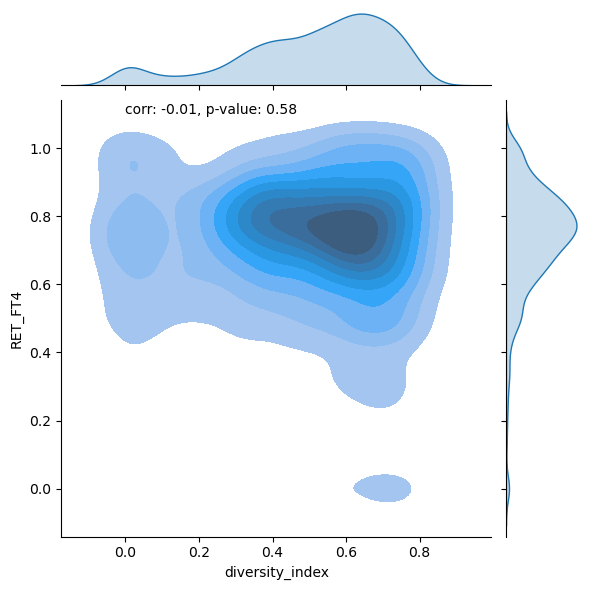

In [ ]:
f = sns.jointplot(data=FT4_institutions, x='diversity_index', y='RET_FT4', kind='kde', fill='b')
f.ax_joint.annotate(f'corr: {corr:.2f}, p-value: {p_value:.2f}', xy=(0,1.1))
plt.savefig('figures/RET_FT4_diversity.png');

**The p-value is around 0.58, which is very large. This means that we can conclude that there is no relationship between retention rate and diversity index at four-year institutions.**

#### Less than four-year institutions

* $H_0:$ There is no relationship between the retension rate and diversity index at less-than-four-year institutions. 

* $H_1:$ There is no relationship between the retension rate and diversity index at less-than-four-year institutions. 

In [ ]:
corr, p_value = stats.pearsonr(FTL4_institutions['diversity_index'], FTL4_institutions['RET_FTL4'])
print(corr, p_value)

-0.08259689032835084 4.15791895176101e-06


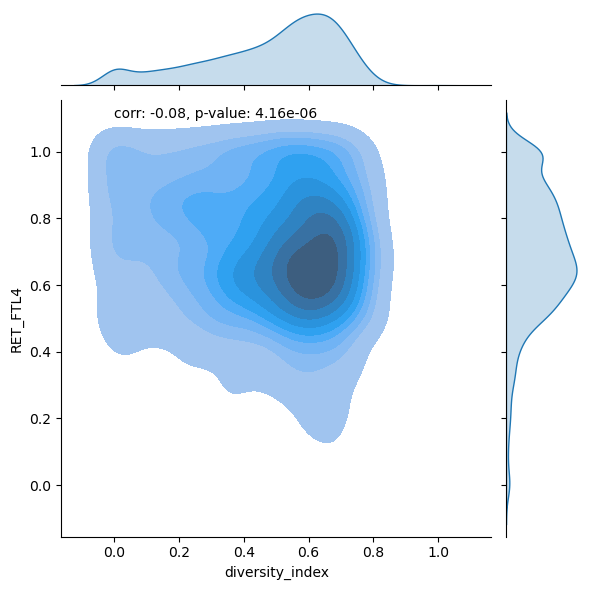

In [ ]:
g = sns.jointplot(data=FTL4_institutions, x='diversity_index', y='RET_FTL4', kind='kde', fill='b')
g.ax_joint.annotate(f'corr: {corr:.2f}, p-value: {p_value:.2e}', xy=(0,1.1))
plt.savefig('figures/RET_FTL4_diversity.png');

**The p-value is very small. This means that we can conclude that there is a relationship between retention rate and diversity index at less-than-four-year institutions.**